# Plotting and visualizing trees with Cassiopeia

Cassiopeia can also be used to quickly and easily plot trees, along with any annotations, in a variety of formats. In this brief tutorial, we will go over some of the visualization options.

In [8]:
import cassiopeia as cas
import pandas as pd

Load in saved allele table and reconstructed tree. The tree in this example is saved in a plaintext format called "Newick," but Cassiopeia supports many different formats (such as ETE3 and NetworkX).

In [9]:
allele_table = pd.read_csv('data/3432_NT_T1_alleletable.txt', sep='\t')
with open('data/3432_NT_T1_tree.processed.tree') as f:
    tree = f.read()

# Initialize tree
tree = cas.data.CassiopeiaTree(tree=tree)

Three functions in `cas.pl` can be used to visualize trees: `cas.pl.plot_matplotlib`, `cas.pl.plot_plotly`, and `cas.pl.upload_and_export_itol`. The former two are the focus of this tutorial, as the third option requires a paid subscription to an online tree visualization service.

Both the `cas.pl.plot_matplotlib` and `cas.pl.plot_plotly` functions have some common arguments that are useful to keep in mind.
* `orient`: Controls the orientation of the tree. Valid options are `left`, `right`, `up`, `down` specifying the direction from the root to the leaves. Additionally, any number may be provided to plot the tree in radial form, where all the leaves emanate out from a central point (these tend to be more pleasing to view). In this case, the number specifies the degrees to rotate the tree from its default orientation.
* `extend_branches`: Extend branches so that the distance from the root to every node is the same. This also tends to be more pleasing to view. By default, this option is turned on.
* `add_root`: Add a synthetic root to the tree. This is useful for trees where multiple subclades are connected directly to the root (which tends to look odd in visualization).

Additionally, both functions have additional arguments to plot annotations alongside the tree.
* `clade_colors`: Provide a dictionary of internal node name-to-color pairs to color this node, all its descendent nodes, and all its descendant branches the specified color. We'll see an example below.
* `meta_data`: Columns in the `CassiopeiaTree.cell_meta` table to plot as colorstrips.
* `allele_table`: Provide the allele table to this option to view an indel heatmap next to the tree.

### Basic visualization

(<Figure size 700x700 with 1 Axes>, <Axes: >)

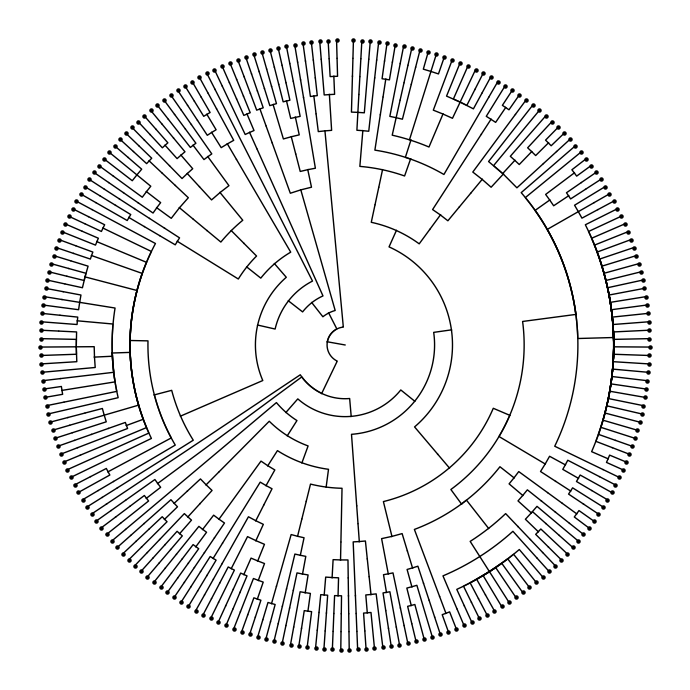

In [10]:
cas.pl.plot_matplotlib(tree, add_root=True)

(<Figure size 700x700 with 1 Axes>, <Axes: >)

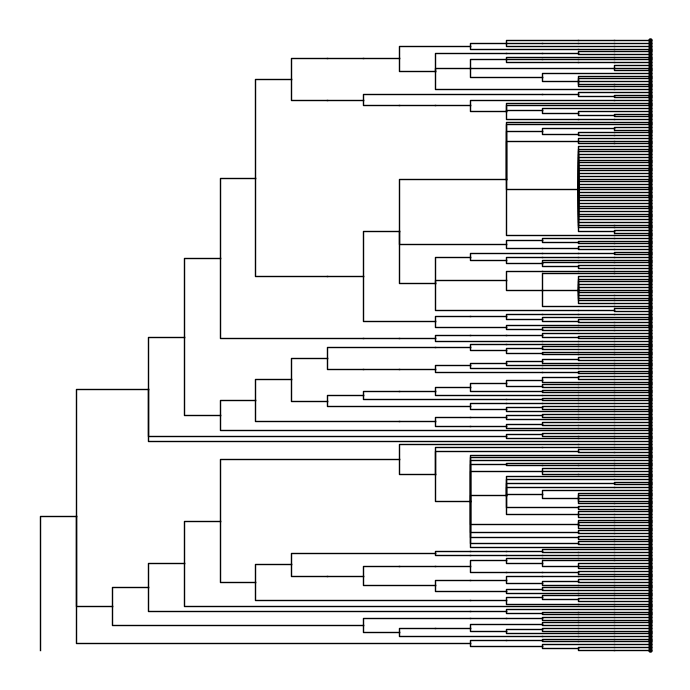

In [11]:
cas.pl.plot_matplotlib(tree, orient='right', add_root=True)

### Annotations

Here, we will plot the indel heatmap along side the tree (using the `allele_table` option) and color two clades that we identified as expanding subclones (using the `clade_colors` option).

filling in multiindex table:   0%|          | 0/1766 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 135.53it/s]


(<Figure size 700x700 with 1 Axes>, <Axes: >)

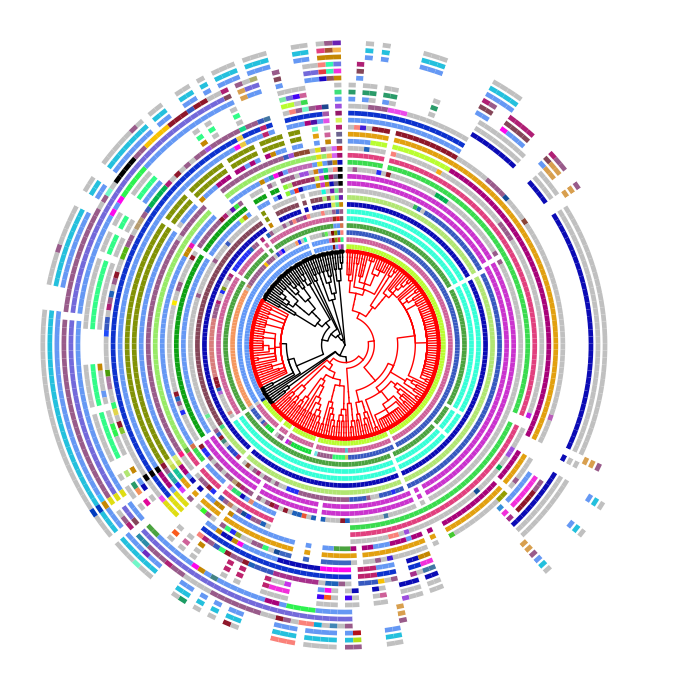

In [12]:
clade_colors = {
    '2|2|2|0|2|0|0|2|0|2|0|0|0|0|2|2|0|2|2|0|0|0|0|0|0|0|0|0|0': 'red',
    '2|4|0|4|4|3|5|4|4|4|4|6|0|3|4|5|0|2|4|0|3|3|3|3|3|0|3|3|0': 'red'
}
cas.pl.plot_matplotlib(tree, allele_table=allele_table, clade_colors=clade_colors)

filling in multiindex table:   0%|          | 0/1766 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 140.88it/s]


(<Figure size 700x700 with 1 Axes>, <Axes: >)

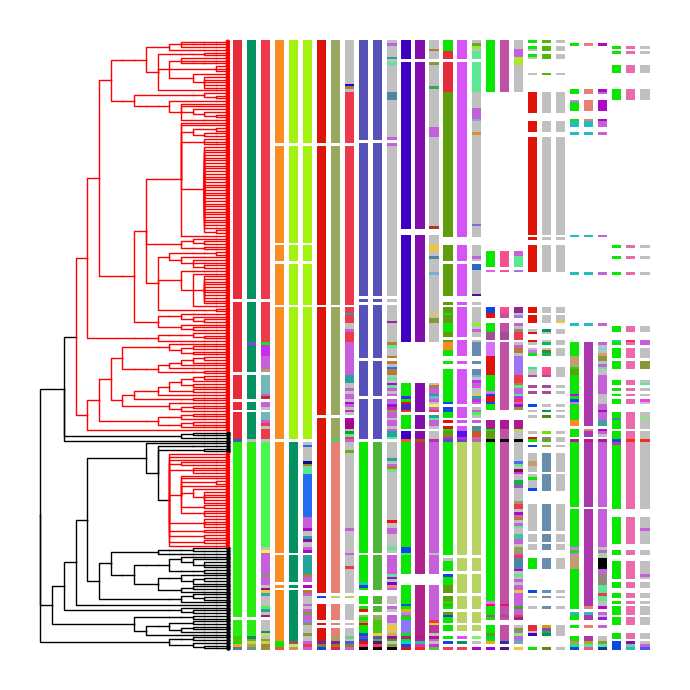

In [13]:
cas.pl.plot_matplotlib(tree, orient='right', allele_table=allele_table, clade_colors=clade_colors)

### Interactive visualization

Cassiopeia also provides the option to visualize trees *interactively* using [Plotly](https://plotly.com/) with the `cas.pl.plot_plotly` function.

It is important to note that interactive plotting tends to get really slow with large trees.

In [14]:
cas.pl.plot_plotly(tree, orient='right', allele_table=allele_table, clade_colors=clade_colors)

filling in multiindex table:   0%|          | 0/1766 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:00<00:00, 134.88it/s]
